In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
! pip install pandas_ta==0.2.45b
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Input, Activation, Concatenate
from matplotlib import pyplot as plt
import seaborn as sns

# Importing dataframe from yahoo finance
df = yf.download(tickers = 'AAPL', start = '2020-01-01', end = '2023-06-23')
print(df) # preview of df



ModuleNotFoundError: No module named 'yfinance'

In [ ]:
# Adding other indicators
og_dates = df.index
df['RSI'] = ta.rsi(df.Close, length=15) #RSI
df['EMAF'] = ta.ema(df.Close, length=20) # Exponential Moving Average with short period
df['EMAM'] = ta.ema(df.Close, length=60) # EMA with medium period
df['EMAS'] = ta.ema(df.Close, length=100) # EMA with long period
df['Target'] = df['Adj Close'].shift(-1) # Next day's Adjusted Closing price
df = df.dropna()
# Separating the dates as they are the index here
dates = df.index
indeces = []
for i in range(len(dates)):
  indeces.append(i)
df.index = indeces
df['Date'] = dates
# print(df.index)
df.head(20)
og_df = df
# print(dates)
# print(dates)
print(og_df)

           Open        High         Low       Close   Adj Close     Volume  \
0     80.875000   81.059998   79.125000   79.182503   77.741524  125522000   
1     79.035004   79.677498   78.272499   79.527496   78.080238  112945200   
2     79.192497   80.860001   78.907501   79.562500   78.114586  133560800   
3     79.812500   80.287498   79.117500   79.485001   78.038513  153532400   
4     79.437500   80.587502   79.302498   80.462502   78.998215   80791200   
..          ...         ...         ...         ...         ...        ...   
769  183.369995  184.389999  182.020004  183.949997  183.949997   57462900   
770  183.960007  186.520004  183.779999  186.009995  186.009995   65433200   
771  186.729996  186.990005  184.270004  184.919998  184.919998  101235600   
772  184.410004  186.100006  184.410004  185.009995  185.009995   49799100   
773  184.899994  185.410004  182.589996  183.960007  183.960007   49515700   

           RSI        EMAF        EMAM        EMAS      Target 

<ipython-input-38-ccacdae824f3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = dates


In [ ]:
cols = list(df)
print(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'Target', 'Date']


In [ ]:
cols.pop(3)
cols.pop(4)
cols.pop(-1)
print(cols)

['Open', 'High', 'Low', 'Adj Close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'Target']


In [ ]:
df = df[cols].astype(float)

In [ ]:
df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target
0,80.875000,81.059998,79.125000,77.741524,63.087694,76.359896,73.748731,73.009175,78.080238
1,79.035004,79.677498,78.272499,78.080238,63.856691,76.661573,73.938199,73.138251,78.114586
2,79.192497,80.860001,78.907501,78.114586,63.938361,76.937851,74.122602,73.265463,78.038513
3,79.812500,80.287498,79.117500,78.038513,63.597463,77.180437,74.298419,73.388623,78.998215
4,79.437500,80.587502,79.302498,78.998215,66.044052,77.493015,74.500520,73.528699,79.363937


In [ ]:
print(df)

           Open        High         Low   Adj Close        RSI        EMAF  \
0     80.875000   81.059998   79.125000   77.741524  63.087694   76.359896   
1     79.035004   79.677498   78.272499   78.080238  63.856691   76.661573   
2     79.192497   80.860001   78.907501   78.114586  63.938361   76.937851   
3     79.812500   80.287498   79.117500   78.038513  63.597463   77.180437   
4     79.437500   80.587502   79.302498   78.998215  66.044052   77.493015   
..          ...         ...         ...         ...        ...         ...   
769  183.369995  184.389999  182.020004  183.949997  70.608966  178.254492   
770  183.960007  186.520004  183.779999  186.009995  73.506809  178.993111   
771  186.729996  186.990005  184.270004  184.919998  69.615570  179.557577   
772  184.410004  186.100006  184.410004  185.009995  69.757196  180.076855   
773  184.899994  185.410004  182.589996  183.960007  65.916490  180.446679   

           EMAM        EMAS      Target  
0     73.748731   73.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)
print(df_scaled)
print(df_scaled.shape)

[[1.70852544e-02 1.28829316e-02 8.03204220e-03 ... 0.00000000e+00
  0.00000000e+00 3.82934924e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.93048971e-03
  1.38715279e-03 6.98161296e-04]
 [1.46240404e-03 1.10192444e-02 5.98282519e-03 ... 3.80937822e-03
  2.75428627e-03 0.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 9.98680962e-01 ... 9.91160846e-01
  9.91921068e-01 9.81736616e-01]
 [9.78457754e-01 9.91706471e-01 1.00000000e+00 ... 9.95832388e-01
  9.96113769e-01 9.72100295e-01]
 [9.83007549e-01 9.85276629e-01 9.82852364e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
(774, 9)


In [ ]:
X_train = []

df_scaled.shape

(774, 9)

In [ ]:
pastcandles = 10 # past number of days to train the model on

for i in range(9): # appending columns and values for the pastcandles to X_train
  X_train.append([])
  for j in range(pastcandles, df_scaled.shape[0]):
    X_train[i].append(df_scaled[j-pastcandles:j, i])

# print(X_train)
# Moving X axis from 0 to 2
X_train = np.moveaxis(X_train, [0], [2])

In [ ]:
X_train = np.array(X_train)
Y = np.array(df_scaled[pastcandles:,-1])
# Reshaping Y
Y = np.reshape(Y, (len(Y), 1))

print("Shape of X: ", X_train.shape)
print("Shape of Y: ", Y.shape)

Shape of X:  (764, 10, 9)
Shape of Y:  (764, 1)


In [ ]:
# Splitting between training and testing data

ratio = int(len(X_train)*0.8)
X_train, X_test = X_train[:ratio], X_train[ratio:]
Y_train, Y_test = Y[:ratio], Y[ratio:]

# Verifying shapes
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (611, 10, 9)
X_test shape:  (153, 10, 9)
Y_train shape:  (611, 1)
Y_test shape:  (153, 1)


In [ ]:
# Making the model

lstm = Input(shape=(pastcandles, 9), name='LSTM_input')
lstm_input = LSTM(150, name='First_layer')(lstm) # LSTM layer with 150 nodes
lstm_input = Dense(1, name='Dense_layer')(lstm_input) # Dense layer with 1 node
result = Activation('linear', name='Result')(lstm_input)
model = Model(inputs=lstm, outputs=result)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=Y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

# lstm_input = Input(shape=(pastcandles, 9), name='lstm_input')
# inputs = LSTM(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# model.compile(optimizer=adam, loss='mse')
# model.fit(x=X_train, y=Y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
37/37 [==============================] - 5s 67ms/step - loss: 0.0256 - val_loss: 0.0035
Epoch 2/30
37/37 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3/30
37/37 [==============================] - 1s 20ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 4/30
37/37 [==============================] - 1s 28ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/30
37/37 [==============================] - 1s 30ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 6/30
37/37 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 7/30
37/37 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 8/30
37/37 [==============================] - 1s 27ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/30
37/37 [==============================] - 1s 29ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 10/30
37/37 [==============================] - 1s 28ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 11/

In [ ]:
Prediction = model.predict(X_test)

# for i in range(10):
#   print(Prediction[i], Y_test[i])

5/5 [==============================] - 1s 12ms/step


In [ ]:
# Using inverse transform to turn it into stock prices for comparison

Y_pred = scaler.inverse_transform(np.repeat(Prediction, df_scaled.shape[1], axis=-1))[:,0]

In [ ]:
# Adding dates to the predicition

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
forecast_dates = pd.date_range(list(dates)[-len(X_test)], periods=len(Y_pred), freq=us_bd).tolist()

prediction_dates = []

for time in forecast_dates:
  prediction_dates.append(time.date())

print(prediction_dates)

[datetime.date(2022, 11, 9), datetime.date(2022, 11, 10), datetime.date(2022, 11, 14), datetime.date(2022, 11, 15), datetime.date(2022, 11, 16), datetime.date(2022, 11, 17), datetime.date(2022, 11, 18), datetime.date(2022, 11, 21), datetime.date(2022, 11, 22), datetime.date(2022, 11, 23), datetime.date(2022, 11, 25), datetime.date(2022, 11, 28), datetime.date(2022, 11, 29), datetime.date(2022, 11, 30), datetime.date(2022, 12, 1), datetime.date(2022, 12, 2), datetime.date(2022, 12, 5), datetime.date(2022, 12, 6), datetime.date(2022, 12, 7), datetime.date(2022, 12, 8), datetime.date(2022, 12, 9), datetime.date(2022, 12, 12), datetime.date(2022, 12, 13), datetime.date(2022, 12, 14), datetime.date(2022, 12, 15), datetime.date(2022, 12, 16), datetime.date(2022, 12, 19), datetime.date(2022, 12, 20), datetime.date(2022, 12, 21), datetime.date(2022, 12, 22), datetime.date(2022, 12, 23), datetime.date(2022, 12, 27), datetime.date(2022, 12, 28), datetime.date(2022, 12, 29), datetime.date(2022, 1

<ipython-input-56-46047c860080>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df['Date'] = pd.to_datetime(original_df['Date'])


<Axes: xlabel='Date', ylabel='Target'>

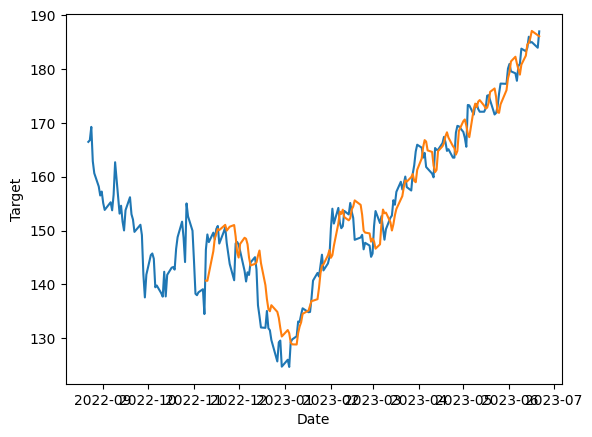

In [ ]:
forecast = pd.DataFrame({'Date':np.array(prediction_dates), 'Target':Y_pred})
forecast['Date'] = pd.to_datetime(forecast['Date'])
# original_df = df['Target']

# og_dates = dates>='2022-08-22'

lst = ['Target', 'Date']


original_df = og_df[lst]
original_df['Date'] = pd.to_datetime(original_df['Date'])
original_df = original_df.loc[original_df['Date']>='2022-08-22']

# original_df = pd.DateFrame({'Date':dates>='2022'})
# print(original_df.head(20))


# indeces = []
# for i in range(len(original_df)):
#   indeces.append(i)
# original_df.index= indeces
# original_df['Date'] = pd.to_datetime(original_df['Date'])
# original_df = original_df.loc[original_df['Date']>='2022-8-22']

# # Plotting

sns.lineplot(x=original_df['Date'], y=original_df['Target'])
sns.lineplot(x=forecast['Date'], y=forecast['Target'])

DatetimeIndex(['2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28'],
              dtype='datetime64[ns]', freq=None)
1/1 [==============================] - 0s 28ms/step
(153,)


<Axes: >

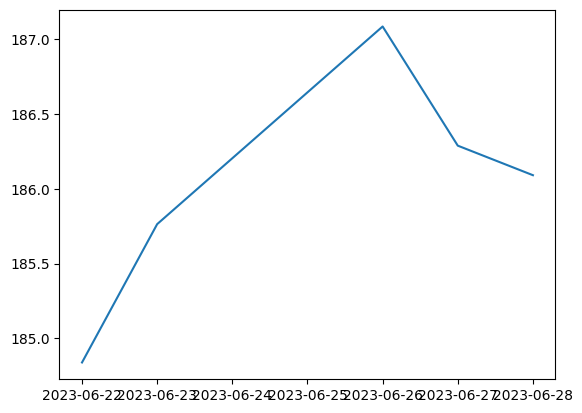

In [ ]:
from pandas.core.api import DateOffset
# Now predicting for the next 5 days

futurecandles = 5

# Getting the dates in the future

futuredates = pd.date_range(list(og_dates)[-1], periods=futurecandles, freq=us_bd).tolist()

# for day in futuredates:
#   print(day + DateOffset(day=2))
# print(type(futuredates))
futuredates = pd.to_datetime(futuredates)
print(futuredates)
# print(dates)

future_prediction = model.predict(X_test[-futurecandles:])
# future_prediction = np.repeat(future_prediction, df_scaled.shape[1], axis=-1)
future_prediction = scaler.inverse_transform(np.repeat(future_prediction, df_scaled.shape[1], axis=-1))[:,0]
print(Y_pred.shape)

output = pd.DataFrame({'Date':np.array(futuredates)})
output['Target'] = future_prediction


# Plotting graph

sns.lineplot(x=futuredates, y=future_prediction)